In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#plt.style.use("ggplot")
np.random.seed(123)

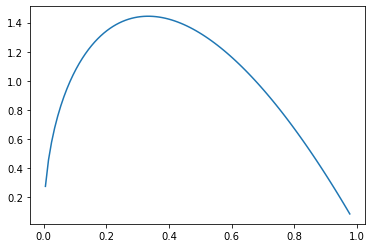

In [3]:
a,b = 1.5,2.0
x = np.linspace(beta.ppf(0.001,a,b),beta.ppf(0.999,a,b),100)
plt.plot(x,beta.pdf(x,a,b))

In [4]:
theta = 0.8
NMCS = 20000

#ランダムウォークの幅
epsilon = 0.5

theta_mcs = [theta]
for i in range(NMCS):
    theta_new = theta + epsilon * np.random.randn()
    if beta.pdf(theta_new,a,b) > beta.pdf(theta,a,b):
        theta = theta_new
    else:
        r = beta.pdf(theta_new,a,b) / beta.pdf(theta,a,b)
        if np.random.rand() < r:
            theta = theta_new
        
    theta_mcs.append(theta)

df = pd.DataFrame(theta_mcs)

In [5]:
df

,0
0,0.800000
1,0.257185
2,0.755857
3,0.755857
4,0.755857
...,...
19996,0.022435
19997,0.022435
19998,0.196157
19999,0.536822


Text(0, 0.5, '$¥Theta$')

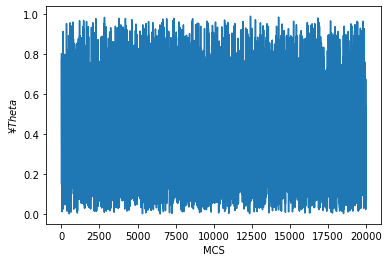

In [6]:
plt.plot(df[0])
plt.xlabel("MCS")
plt.ylabel("$¥Theta$")

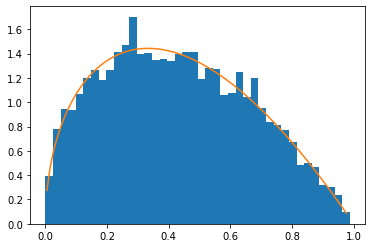

In [7]:
plt.hist(df[0][1000:],density=True,bins=40)
x = np.linspace(beta.ppf(0.001,a,b),beta.ppf(0.999,a,b),100)
plt.plot(x,beta.pdf(x,a,b))